#Pre-processamento do dataset

###Notebook de pré-processamento (colab):

https://colab.research.google.com/drive/1_BZZPeIJiUu-6qWBgnKe4ftQOGgesNZk


Dados brutos obtidos do Centro de apredizagem de máquina e sistema inteligentes - Universidade da Califórnia

https://archive.ics.uci.edu/ml/machine-learning-databases/movies-mld/data/main.html


#Importando dependências

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

import tensorflow as tf


#Importação dos dados



### Resumo

*   Features de entrada: diretor e genero
*   Target: escolha entre 4 tipos diferentes de estúdio
*   Dados de treino: 88 exemplos (80% do total)
*   Dados de teste: 22 exemplos (20% do total)


In [3]:
dataset = pd.read_csv('https://drive.google.com/uc?export=download&id=165o96AULXo8eMZciKMTGyPxdDVFpXXrq')
dataset.head(3)

,diretor,produtor,genero,estudio
0,37,25,1,Shamley
1,3,58,1,Warners
2,34,2,1,Paramount


# Separando features/target e codificando target

In [ ]:
X = dataset.iloc[:,0:-1]
X.head(3)

,diretor,produtor,genero
0,37,25,1
1,3,58,1
2,34,2,1


In [ ]:
le = LabelEncoder()
y = pd.DataFrame(le.fit_transform(dataset['estudio']))
y.value_counts().sort_index()

0     7
1     3
2    13
3    27
4    12
5     9
6    30
7     5
8     4
9    13
dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.20)

# Indução do Modelo
 




###Criando camadas densas da rede:

*   camada de entrada de 3 features
*   camada oculta de 64 neurônios
*   camada de classificação softmax com 10 classes

In [ ]:
model = tf.keras.models.Sequential()# usando APIs keras-tensorflow
 
tf.keras.regularizers.l2(l2=0.1) #regularização dos coeficientes -> regularização l2 com lambda em 0.1
 
model.add(tf.keras.layers.Dense(units=24, activation='sigmoid', input_shape=[len(X.keys())]))# primeira camada oculta com 64 neurônios e ativação sigmoid
 
#model.add(tf.keras.layers.Dense(units=64, activation='relu'))# ativação relu com resultados inferiores a fdp (função densidade de probabilidade) sigmoid
 
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))# camada de output softmax com 10 classes -> [0,9]
 
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])# otimizador para convergência gradiante: adam

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 64)                256       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


# Treinamento do modelo por 15 épocas

In [ ]:
historico =model.fit(X_train, y_train, epochs=15, validation_split=0.1)

Epoch 1/15
3/3 [==============================] - 0s 50ms/step - loss: 2.3186 - accuracy: 0.2045 - val_loss: 2.4769 - val_accuracy: 0.3000
Epoch 2/15
3/3 [==============================] - 0s 7ms/step - loss: 2.2981 - accuracy: 0.2045 - val_loss: 2.4605 - val_accuracy: 0.3000
Epoch 3/15
3/3 [==============================] - 0s 7ms/step - loss: 2.2771 - accuracy: 0.2045 - val_loss: 2.4435 - val_accuracy: 0.3000
Epoch 4/15
3/3 [==============================] - 0s 7ms/step - loss: 2.2556 - accuracy: 0.2045 - val_loss: 2.4285 - val_accuracy: 0.3000
Epoch 5/15
3/3 [==============================] - 0s 6ms/step - loss: 2.2362 - accuracy: 0.2045 - val_loss: 2.4138 - val_accuracy: 0.3000
Epoch 6/15
3/3 [==============================] - 0s 6ms/step - loss: 2.2154 - accuracy: 0.2045 - val_loss: 2.4002 - val_accuracy: 0.3000
Epoch 7/15
3/3 [==============================] - 0s 6ms/step - loss: 2.1940 - accuracy: 0.2045 - val_loss: 2.3889 - val_accuracy: 0.3000
Epoch 8/15
3/3 [=================

# Analise de Over/underfitting (train vs cross validation data)

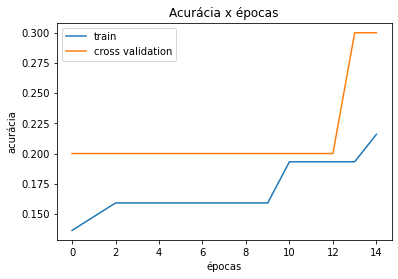

In [ ]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia x épocas')
plt.xlabel('épocas')
plt.ylabel('acurácia')
plt.legend(['train','cross validation'])

# Avalidação com dados de teste, problemas e próximos passos

In [ ]:
y_pred= np.argmax(model.predict(X_test), axis=-1)
y_pred

array([6, 3, 6, 6, 6, 6, 6, 9, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         2
           3       1.00      0.20      0.33         5
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         4
           6       0.22      1.00      0.36         5
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         3

    accuracy                           0.24        25
   macro avg       0.14      0.13      0.08        25
weighted avg       0.24      0.24      0.14        25



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 2ms/step - loss: 2.2583 - accuracy: 0.2000


###Aumentando a acertividade

1.   Maior quantidade de features para reduzir o underfitting (high bias)
2.   Poucos dados de treinamento

###Proximo passos:

1.   Revisitar processos do negócio para tentar identificar mais features com relevância para o modelo
2.   Tentar obter mais dados em planilhas de controle das áreas
3.   Separar dados de cross validation e contruir gráficos de diagnótico para identificar/confirmar (bias e variância do modelo)